In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_dlim_tfidf.csv")

In [3]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..D-Limonene
0,0,0.0,0.21444,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.341772
1,1,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,1,0,0,0.341772
2,2,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.324705,...,1,0,0,0,0,0,1,0,0,0.341772
3,2,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.324705,...,1,0,0,0,0,0,1,0,0,0.341772
4,3,0.0,0.00000,0.0,0.0,0.0,0.145484,0.0,0.0,0.000000,...,0,1,0,0,0,0,0,0,0,0.341772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42974,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.240506
74996,42975,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.240506
74997,42976,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,1,1,1,1,1,1,1,1,1,0.240506
74998,42976,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,1,1,1,1,1,1,1,1,1,0.240506


Splitting dependent and independent variables

In [4]:
X = df_knn.drop(['X..D-Limonene', 'index'], axis = 1)
y = df_knn[['X..D-Limonene']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.34177215],
       [0.34177215],
       [0.34177215],
       ...,
       [0.24050633],
       [0.24050633],
       [0.24050633]])

<AxesSubplot:ylabel='Count'>

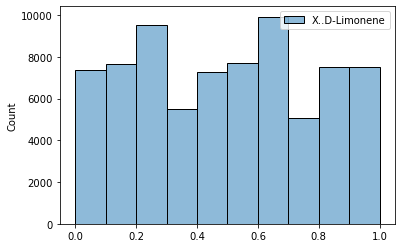

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [10]:
mean_absolute_error(y_val, y_pred_knreg)

0.1033840099071112

In [11]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.7878271592742201

In [12]:
#val
r2_score(y_val, y_pred_knreg)

0.6350602002386219

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([1.13375184e-03, 1.08948529e-03, 8.06486257e-04, 1.09646574e-03,
       8.86342999e-04, 2.69238732e-03, 5.94551604e-03, 3.03220100e-03,
       2.80734280e-04, 2.78958093e-03, 8.14785818e-04, 3.92301192e-03,
       9.40439131e-04, 6.46199193e-04, 3.25902029e-04, 8.56579223e-04,
       3.30317464e-03, 1.55073951e-03, 5.31612842e-04, 1.00389622e-03,
       1.94054306e-03, 1.35390120e-03, 8.70977008e-04, 9.36490525e-04,
       1.24834184e-03, 4.66123003e-04, 1.18559207e-03, 1.53606515e-03,
       9.75782815e-04, 5.23794217e-04, 4.84745855e-03, 8.54792153e-04,
       1.56228511e-03, 5.10215964e-04, 1.88974137e-03, 1.06407245e-03,
       8.76465132e-04, 4.36702124e-03, 2.38210688e-04, 2.20818685e-03,
       2.61469124e-04, 1.50332272e-03, 6.12119344e-04, 5.75508630e-03,
       1.16666319e-03, 9.98063858e-04, 1.45948741e-03, 7.88502437e-04,
       1.54298224e-03, 1.15011912e-03, 1.11566909e-03, 4.19010462e-04,
       1.14318846e-03, 2.39181316e-03, 1.02529160e-03, 3.55829604e-04,
      

In [16]:
selector.threshold_

0.0021321961620469083

In [17]:
mask = selector.get_support()

In [18]:
mask

array([False, False, False, False, False,  True,  True,  True, False,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True, False,  True, False, False,  True, False,
        True, False,

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_5,tfidf_6,tfidf_7,tfidf_9,tfidf_11,tfidf_16,tfidf_30,tfidf_37,tfidf_39,tfidf_43,...,diesel,earthy,grape,lemon,mint,orange,pungent,skunk,strawberry,sweet
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.14162,0.189796,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.198545,...,0,0,0,0,0,0,0,0,0,1
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.198545,...,0,0,0,0,0,0,0,0,0,1
4,0.145484,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
74996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
74997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,1,1,1,1,1,1,1,1,1,1
74998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,1,1,1,1,1,1,1,1,1,1


In [21]:
selected_X.columns.to_list()

['tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_9',
 'tfidf_11',
 'tfidf_16',
 'tfidf_30',
 'tfidf_37',
 'tfidf_39',
 'tfidf_43',
 'tfidf_53',
 'tfidf_73',
 'tfidf_78',
 'tfidf_82',
 'tfidf_90',
 'tfidf_93',
 'tfidf_107',
 'tfidf_110',
 'tfidf_116',
 'tfidf_119',
 'tfidf_121',
 'tfidf_124',
 'tfidf_126',
 'tfidf_128',
 'tfidf_135',
 'tfidf_141',
 'tfidf_144',
 'tfidf_145',
 'tfidf_149',
 'tfidf_153',
 'tfidf_158',
 'tfidf_162',
 'tfidf_167',
 'tfidf_168',
 'tfidf_171',
 'tfidf_173',
 'tfidf_175',
 'tfidf_178',
 'tfidf_199',
 'tfidf_200',
 'tfidf_203',
 'tfidf_207',
 'tfidf_210',
 'tfidf_211',
 'tfidf_216',
 'tfidf_230',
 'tfidf_231',
 'tfidf_236',
 'tfidf_239',
 'tfidf_240',
 'tfidf_245',
 'tfidf_253',
 'tfidf_258',
 'tfidf_264',
 'tfidf_272',
 'tfidf_277',
 'tfidf_281',
 'tfidf_283',
 'tfidf_285',
 'tfidf_303',
 'tfidf_309',
 'tfidf_312',
 'tfidf_314',
 'tfidf_319',
 'tfidf_323',
 'tfidf_329',
 'tfidf_336',
 'tfidf_337',
 'tfidf_338',
 'tfidf_342',
 'tfidf_345',
 'tfidf_355',
 'tfidf_357'

In [22]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_dlim.pkl")
joblib.dump(selector, "selector_knn_tfidf_dlim.pkl")

['selector_knn_tfidf_dlim.pkl']

Train test split (after Feature Selection)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [24]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [25]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [26]:
mean_absolute_error(y_val, y_pred_knreg)

0.10166514395063449

In [27]:
mean_squared_error(y_val, y_pred_knreg)

0.02848084135638783

In [28]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.16876267761678773

In [29]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.7973898793997419

In [30]:
#val
r2_score(y_val, y_pred_knreg)

0.6619689106236002

Hyperparameter Tuning

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [35]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.04491710696863599

In [37]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.015860288282700013

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.12593763648210973

In [39]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9825339711101667

In [40]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.811758702668298

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [41]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [42]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_dlim.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_dlim.pkl")

['y_test_knreg_tfidf_dlim.pkl']

In [43]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.04438963656620352

In [44]:
r2_score(y_test, y_pred_knreg_test)

0.8244133690178217

In [45]:
mean_squared_error(y_test, y_pred_knreg_test)

0.014989957390454197

In [46]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.12243348149282612

In [47]:
y_test

,X..D-Limonene
11591,0.367089
52020,0.626582
34666,0.354430
22169,0.139241
23049,0.267932
...,...
60863,0.261603
32316,0.257384
60933,0.261603
43206,0.721519


In [48]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

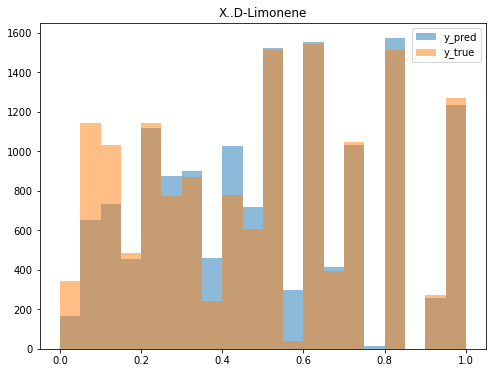

<Figure size 432x288 with 0 Axes>

In [49]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..D-Limonene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_dlim.png')

Pearson R

In [50]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.912
P-value: 0.000


<AxesSubplot:>

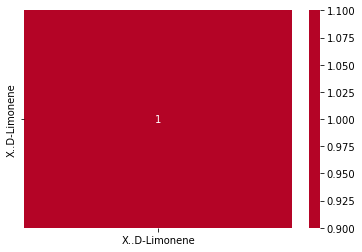

In [51]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)